#다음주 12주차 수업은 온라인 녹화로만 진행합니다.

In [ ]:
!gdown https://drive.google.com/uc?id=1bBHHdWwRsOBO0MiqrDWag3v4Zsroea7V

Downloading...
From: https://drive.google.com/uc?id=1bBHHdWwRsOBO0MiqrDWag3v4Zsroea7V
To: /content/medical.csv
100% 9.14M/9.14M [00:00<00:00, 35.8MB/s]


In [ ]:
#라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#데이터셋 불러오기
df = pd.read_csv('/content/medical.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,No


In [ ]:
#데이터 컬럼명 확인하기
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'SMS_received', 'No-show'],
      dtype='object')

In [ ]:
#전반적인 데이터 정보 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   SMS_received    110527 non-null  int64  
 8   No-show         110527 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 7.6+ MB


In [ ]:
#컬럼별로 결측치 확인하기 :isnull().any()
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
SMS_received      False
No-show           False
dtype: bool

In [ ]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [ ]:
df['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [ ]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [ ]:
df['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [ ]:
#통계값을 이용하여 이상치 확인하기
df.describe()

,PatientId,AppointmentID,Age,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000


In [ ]:
#이상치 제거하기
df=df[df.Age>=0]

In [ ]:
#이상치 제거되었는지 확인하기
df.Age.min()

0

In [ ]:
#수치형으로 데이터타입 변환하기 :map()사용
df['No-show']=df['No-show'].map({'Yes':1,'No':0})

In [ ]:
#타입변환이 되었는지 확인하기
df['No-show'].value_counts()

0    88207
1    22319
Name: No-show, dtype: int64

In [ ]:
#datetime으로 형 변환하기:'AppointmentDay','ScheduledDay'
df.AppointmentDay=pd.to_datetime(df.AppointmentDay)
df.ScheduledDay=pd.to_datetime(df.ScheduledDay)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   SMS_received    110526 non-null  int64              
 8   No-show         110526 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(1), int64(4), object(2)
memory usage: 8.4+ MB


In [ ]:
df['AppointmentDay']

0        2016-04-29 00:00:00+00:00
1        2016-04-29 00:00:00+00:00
2        2016-04-29 00:00:00+00:00
3        2016-04-29 00:00:00+00:00
4        2016-04-29 00:00:00+00:00
                    ...           
110522   2016-06-07 00:00:00+00:00
110523   2016-06-07 00:00:00+00:00
110524   2016-06-07 00:00:00+00:00
110525   2016-06-07 00:00:00+00:00
110526   2016-06-07 00:00:00+00:00
Name: AppointmentDay, Length: 110526, dtype: datetime64[ns, UTC]

In [ ]:
df['ScheduledDay']

0        2016-04-29 18:38:08+00:00
1        2016-04-29 16:08:27+00:00
2        2016-04-29 16:19:04+00:00
3        2016-04-29 17:29:31+00:00
4        2016-04-29 16:07:23+00:00
                    ...           
110522   2016-05-03 09:15:35+00:00
110523   2016-05-03 07:27:33+00:00
110524   2016-04-27 16:03:52+00:00
110525   2016-04-27 15:09:23+00:00
110526   2016-04-27 13:30:56+00:00
Name: ScheduledDay, Length: 110526, dtype: datetime64[ns, UTC]

In [ ]:
#예약하고 병원을 방문하는 기간 구하기 :일수 차이로 계산(dt.dayofyear)
df['waitingDay']=df['AppointmentDay'].dt.dayofyear-df['ScheduledDay'].dt.dayofyear
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   SMS_received    110526 non-null  int64              
 8   No-show         110526 non-null  int64              
 9   waitingDay      110526 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(1), int64(5), object(2)
memory usage: 9.3+ MB


In [ ]:
#df['waitingDay]의 통계값 확인하기
df['waitingDay'].describe()

count    110526.000000
mean          9.979046
std          15.607516
min        -223.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         146.000000
Name: waitingDay, dtype: float64

In [ ]:
#watingDay의 이상치 제거하기
df=df[df['waitingDay']>=0]

In [ ]:
df['waitingDay'].min()

0

<Axes: xlabel='Age'>

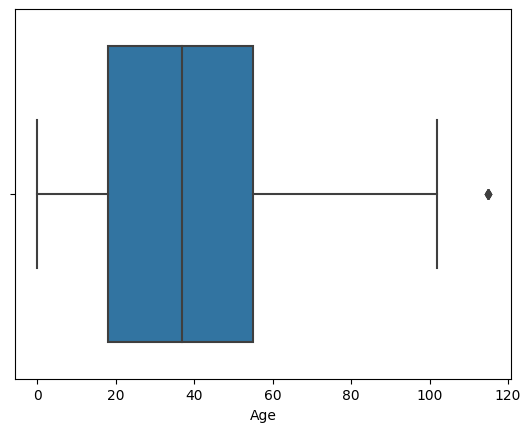

In [ ]:
#'Age' 이상치있는지 확인하기 : boxplot
sns.boxplot(data=df,x='Age')

In [ ]:
#이상치 제거하기
df=df[df.Age<=110]

<Axes: xlabel='Age'>

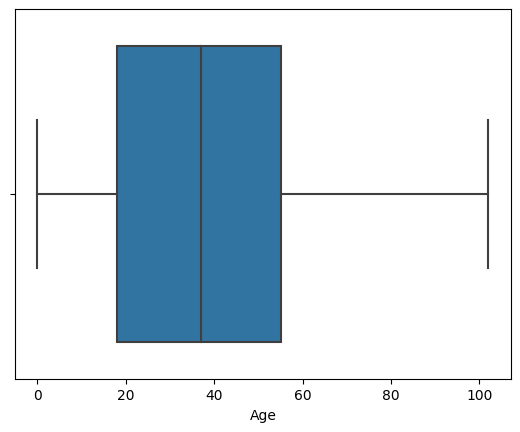

In [ ]:
#'Age' 이상치 확인하기 : boxplot
sns.boxplot(data=df,x='Age')

In [ ]:
df['waitingDay'].value_counts()

0      38561
2       6725
4       5290
1       5213
7       4906
       ...  
101        1
82         1
126        1
125        1
123        1
Name: waitingDay, Length: 123, dtype: int64

어떤 변수가 노쇼와
관련이 있는지를 파악하기

In [ ]:
#waiting_day와 ‘No-show'

In [ ]:
#당일예약 건 중에서 노쇼 비율 : wating_day==0
a=df[df.waitingDay==0]['waitingDay'].value_counts() #전체 당일예약 건수
b=df[(df.waitingDay==0)&(df['No-show']==1)]['waitingDay'].value_counts() #당일예약의 노쇼 건수
b/a

0    0.046472
Name: waitingDay, dtype: float64

In [ ]:
#예약한 시점부터 병원 방문 날까지 기다리는 일수에 따라 노쇼관련 여부 확인하기

In [ ]:
#노쇼데이터와 노쇼가 아닌 데이터로 나누기
no_show=df[df['No-show']==1]
show=df[df['No-show']==0]

In [ ]:
# waiting_day가 10일 이내인 데이터 저장하기
no1=no_show[no_show['waitingDay']<=10]['waitingDay']
show1=show[show['waitingDay']<=10]['waitingDay']

In [ ]:
no1

6         2
7         2
11        3
17        1
20        2
         ..
110484    4
110492    0
110496    2
110515    2
110516    1
Name: waitingDay, Length: 11112, dtype: int64

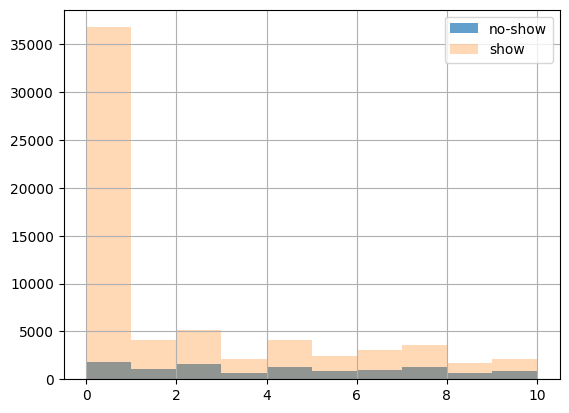

In [ ]:
#히스토그램으로 시각화하기
no1.hist(alpha=0.7,label='no-show')
show1.hist(alpha=0.3,label='show')
plt.legend()

In [ ]:
#예약잡은 날에 따른 노쇼 건수와 노쇼가 아닌 건수 비교하기

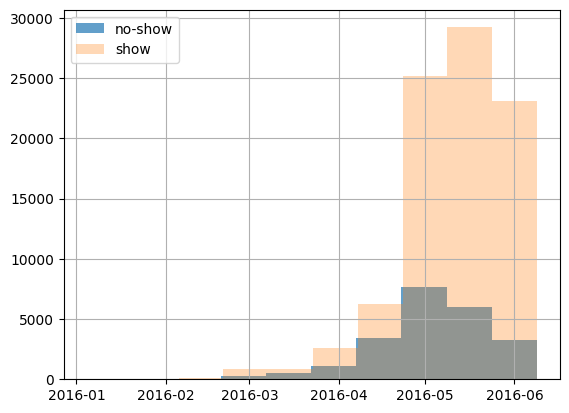

In [ ]:
no2=no_show['ScheduledDay']
show2=show['ScheduledDay']
no2.hist(alpha=0.7,label='no-show')
show2.hist(alpha=0.3,label='show')
plt.legend()

In [ ]:
#병원 방문날에 따른 노쇼 발생 건수와 그렇지 않은 건수 비교

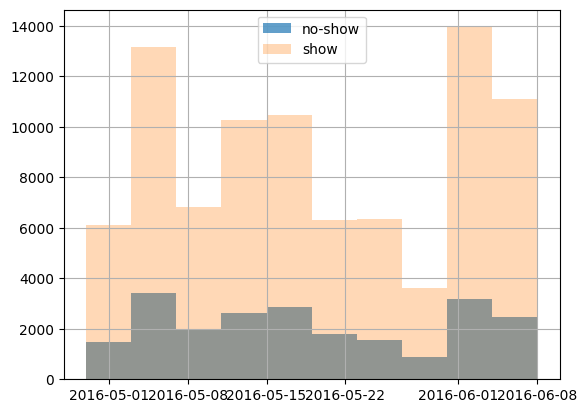

In [ ]:
no3=no_show['AppointmentDay']
show3=show['AppointmentDay']
no3.hist(alpha=0.7,label='no-show')
show3.hist(alpha=0.3,label='show')
plt.legend()

In [ ]:
#재방문 환자와 노쇼 :df에서

In [ ]:
#환자번호를 가지고 value_counts()를 구하면 환자별 예약횟수를 알수 있음, 상위10명만 확인하기:iloc사용
df.PatientId.value_counts().iloc[0:10]

8.220000e+14    141
3.350000e+13    127
7.580000e+13    124
8.190000e+13    123
2.690000e+13    117
6.540000e+13    112
6.680000e+13    106
1.450000e+13    104
8.530000e+14    102
8.920000e+13    101
Name: PatientId, dtype: int64

<Axes: >

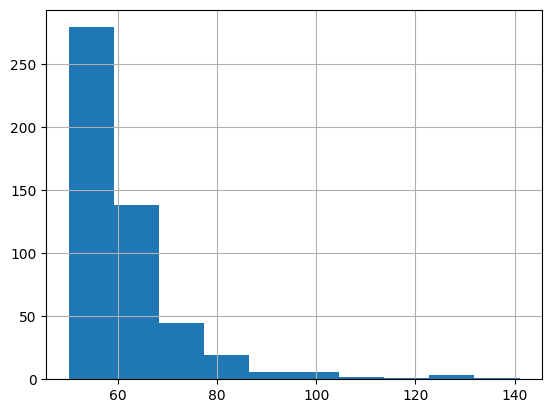

In [ ]:
#상위 500명 환자의 예약횟수 분포 확인하기
patient=df.PatientId.value_counts().iloc[0:500]
patient
patient.hist()

한명당 최소 50번의 예약을 하고 최대 141회 예약을 한다.
가장 많은 예약은 50~60사이임
한 환자가 병원을 여러번 예약하는 것을 알수 있음

In [ ]:
#노쇼 환자별 watingDay 파악 : no_show데이터에서
  #50일 이상 기다린다면
no_show[no_show['waitingDay']>=50]['PatientId'].value_counts()

3.380000e+14    6
7.250000e+13    4
7.850000e+13    4
8.340000e+12    4
5.670000e+12    3
               ..
3.110000e+11    1
7.240000e+13    1
9.680000e+12    1
9.850000e+14    1
2.930000e+12    1
Name: PatientId, Length: 790, dtype: int64

In [ ]:
#10일~19일
no_show[(no_show['waitingDay']>=10)&(no_show['waitingDay']<20)]['PatientId'].value_counts()

9.740000e+13    9
1.560000e+13    8
9.440000e+11    7
7.580000e+13    7
2.490000e+13    7
               ..
3.530000e+12    1
2.320000e+12    1
2.157992e+09    1
4.690000e+11    1
2.760000e+14    1
Name: PatientId, Length: 2296, dtype: int64

In [ ]:
#1일~9일
no_show[(no_show['waitingDay']>=1)&(no_show['waitingDay']<=9)]['PatientId'].value_counts()

3.150000e+13    13
9.160000e+13    13
8.140000e+13    13
9.180000e+13    12
2.270000e+13    12
                ..
9.560000e+14     1
3.758423e+10     1
9.732838e+10     1
3.300000e+13     1
6.460000e+14     1
Name: PatientId, Length: 3106, dtype: int64

<Axes: xlabel='SMS_received', ylabel='waitingDay'>

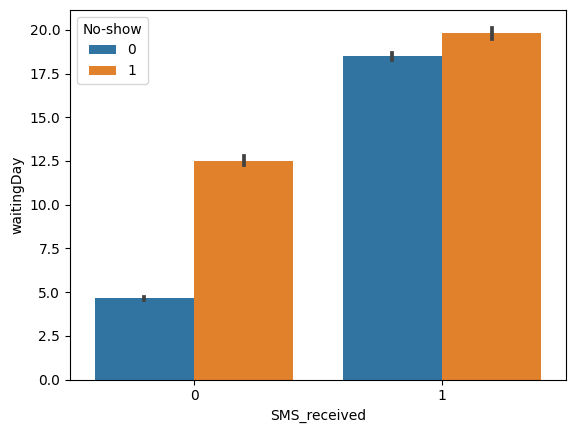

In [ ]:
#노쇼 여부와 SMS_received,watindDay간의 관계 파악 :df에서
sns.barplot(y='waitingDay',x='SMS_received',data=df,hue='No-show')

<Axes: xlabel='No-show', ylabel='waitingDay'>

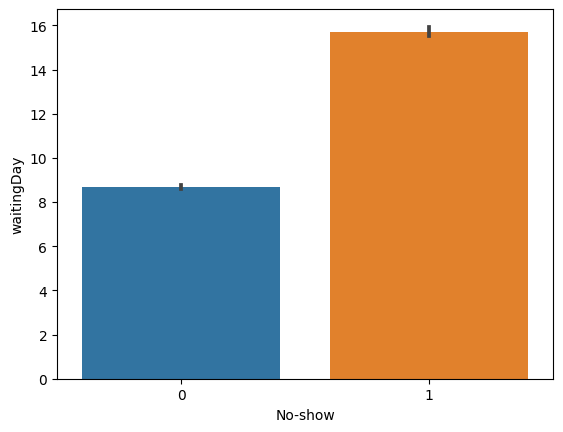

In [ ]:
sns.barplot(y='waitingDay',data=df,x='No-show')

In [ ]:
#SMS_received에 따른 ‘No-show’ 비율 파악
a=len(df[(df['SMS_received'] == 1) & (df['No-show'] == 1)])
b=len(df[(df['SMS_received'] == 0) & (df['No-show'] == 0)])
a/(a+b)

0.13519871581977194

In [ ]:
a=len(df[(df['SMS_received'] == 1) & (df['No-show'] == 1)])
b=len(df[(df['SMS_received'] == 1) & (df['No-show'] == 0)])
a/(a+b)

0.2756927591850556

In [ ]:
#얼마나 많은 환자가 예정된 날짜에 오지 않았는가?
no_show_count = df['No-show'].sum()
no_show_count

22292

<Axes: xlabel='Gender', ylabel='count'>

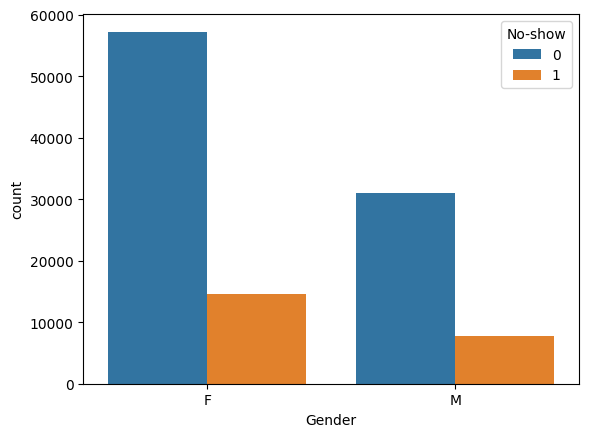

In [ ]:
#성별에 따른 노쇼 여부를 countplot을 이용하여 시각화해보자.
sns.countplot(x='Gender', hue='No-show', data=df)

In [ ]:
#이외에 다양한 방법으로 분석해 보고 결과를 작성하시오.

1. neighbourhood에 따른 노쇼 확인

In [ ]:
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4429
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

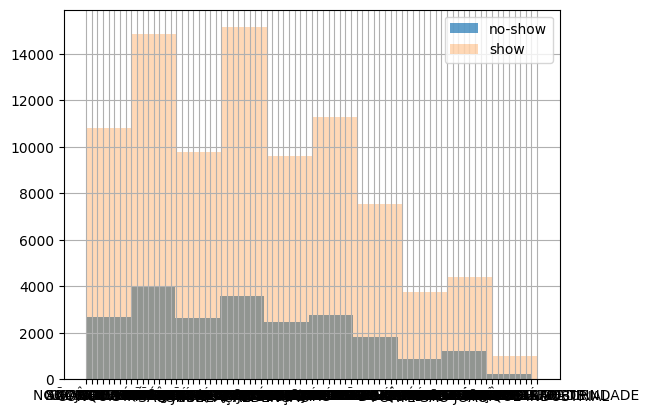

In [ ]:
no_hood=no_show['Neighbourhood']
show_hood=show['Neighbourhood']
no_hood.hist(alpha=0.7,label='no-show')
show_hood.hist(alpha=0.3,label='show')
plt.legend()
plt.show()

특별히 show에 대한 no-show의 비율이 높은 데이터는 없었다.  
neighbourhood는 no-show와 관련 있는 요인이 아니다.

2. 환자별 예약 횟수에 따른 노쇼 비율

In [ ]:
#환자번호를 가지고 value_counts()를 구하면 환자별 예약횟수를 알수 있음
df['PatientId'].value_counts()

8.220000e+14    141
3.350000e+13    127
7.580000e+13    124
8.190000e+13    123
2.690000e+13    117
               ... 
6.978773e+10      1
9.847957e+10      1
4.226995e+10      1
5.734915e+10      1
9.481592e+10      1
Name: PatientId, Length: 6100, dtype: int64

In [ ]:
df['PatientId'].value_counts().describe()

count    6100.000000
mean       18.107213
std        20.025799
min         1.000000
25%         1.000000
50%         9.000000
75%        32.000000
max       141.000000
Name: PatientId, dtype: float64

예약횟수가 9(환자별 예약횟수 중앙값)번 미만인 환자 그룹과 9번 이상인 환자 그룹을 나누어 비교

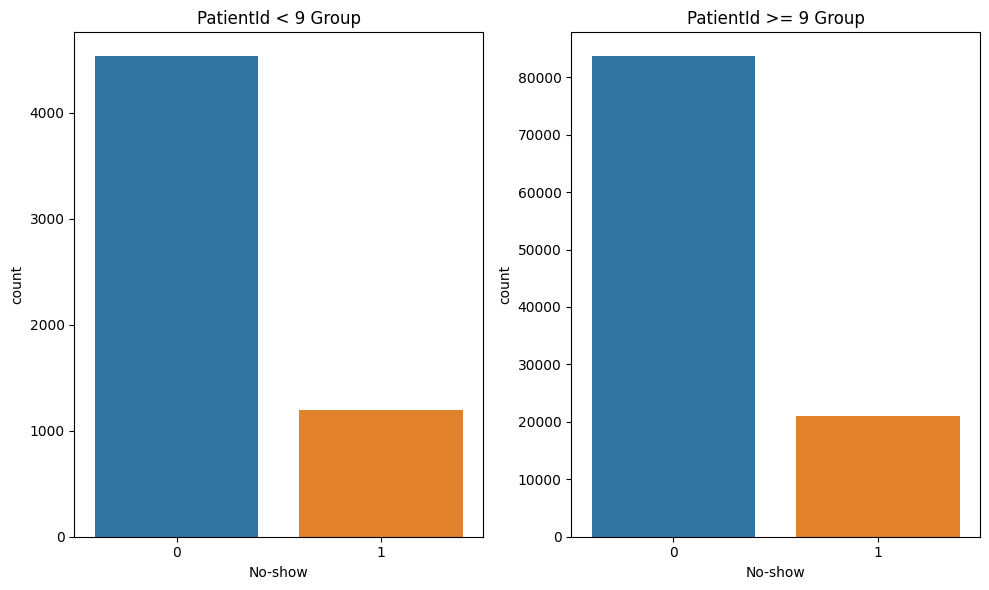

In [ ]:
patient_id_counts = df['PatientId'].value_counts()

group_9_below = df[df['PatientId'].isin(patient_id_counts[patient_id_counts < 9].index)]
group_9_above = df[df['PatientId'].isin(patient_id_counts[patient_id_counts >= 9].index)]

# 두 그룹에서 No-show 값이 1 또는 0인 경우를 선택한다.
group_9_below_no_show = group_9_below[group_9_below['No-show'].isin([0, 1])]
group_9_above_no_show = group_9_above[group_9_above['No-show'].isin([0, 1])]

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='No-show', data=group_9_below_no_show)
plt.title('PatientId < 9 Group')

plt.subplot(1, 2, 2)
sns.countplot(x='No-show', data=group_9_above_no_show)
plt.title('PatientId >= 9 Group')

plt.tight_layout()
plt.show()

환자별 예약 횟수 9를 기준으로 두 그룹을 비교한 결과, 차이가 없었다.

In [ ]:
patient_id_counts = df['PatientId'].value_counts()

# 각 PatientId별 No-show가 1인 비율을 계산합니다.
no_show_percentage = df.groupby('PatientId')['No-show'].mean()
no_show_percentage

PatientId
3.920000e+04    0.000000
4.370000e+04    0.000000
9.380000e+04    0.000000
1.420000e+05    0.000000
5.380000e+05    0.000000
                  ...   
9.960000e+14    0.214286
9.970000e+14    0.170213
9.980000e+14    0.184211
9.990000e+14    0.171429
1.000000e+15    0.076923
Name: No-show, Length: 6100, dtype: float64

두 그룹으로 나누지 않고, 산점도로 시각화하기

In [ ]:
patient_id_counts = df['PatientId'].value_counts()

# 환자별 No-show가 0인 총 개수 계산
show_count = df[df['No-show'] == 0].groupby('PatientId')['No-show'].count()

# 환자별 No-show가 1인 총 개수 계산
no_show_count = df[df['No-show'] == 1].groupby('PatientId')['No-show'].count()

# 환자별 예약횟수, 환자별 show_count, 환자별 no-show_count를 하나의 데이터 프레임으로 합침
merged_data = pd.DataFrame({'PatientId_Count': patient_id_counts, 'Show_Count': show_count, 'No-show_Count': no_show_count})
merged_data

,PatientId_Count,Show_Count,No-show_Count
3.920000e+04,1,1.0,NaN
4.370000e+04,1,1.0,NaN
9.380000e+04,1,1.0,NaN
1.420000e+05,1,1.0,NaN
5.380000e+05,1,1.0,NaN
...,...,...,...
9.960000e+14,28,22.0,6.0
9.970000e+14,47,39.0,8.0
9.980000e+14,38,31.0,7.0
9.990000e+14,35,29.0,6.0


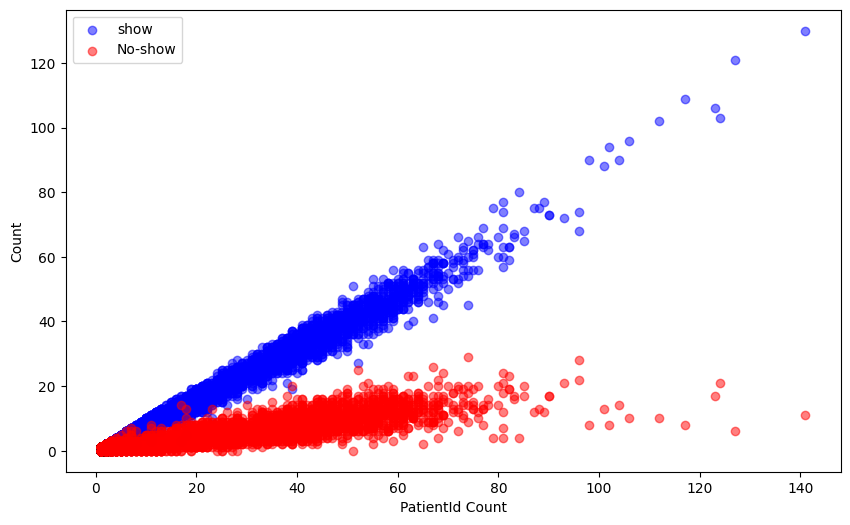

In [ ]:
merged_data = merged_data.fillna(0)  # NaN 값은 0으로 채운다.

# 시각화
plt.figure(figsize=(10, 6))

plt.scatter(merged_data['PatientId_Count'], merged_data['Show_Count'], color='blue', alpha=0.5, label='show')
plt.scatter(merged_data['PatientId_Count'], merged_data['No-show_Count'], color='red', alpha=0.5, label='No-show')
plt.xlabel('PatientId Count')
plt.ylabel('Count')
plt.legend()

plt.show()

예약횟수가 많은 환자는 예약횟수가 적은 환자와 노쇼 횟수가 비슷했으나, 예약횟수가 적은 환자보다 예약을 지킨 횟수가 더 많았다.  
즉, 예약횟수가 많은 단골 환자의 노쇼 비율이 예약횟수가 적은 환자보다 적다.

In [ ]:
#노쇼를 최소화하려면 어떻게 해야하는가?

1. 예약횟수가 적은 환자를 대상으로 집중 관리하여 노쇼가 일어나지 않도록 한다. 예를 들어 집중 관리 대상에 속하는 예약횟수 적은 환자에게는 내원일 임박 시 직접 확인 전화를 하거나 문자로 답을 받는다. 예약횟수가 적은 환자에게만 노쇼 방지용 선예약금을 요구하는 방법도 있으나, 노쇼가 줄어들 순 있어도 그에 대한 반발심으로 신규 환자가 줄어들 수 있다는 점을 유의해야 한다.

2. 예약횟수가 적은 환자를 단골 고객으로 만들면 그 환자의 노쇼 비율이 줄어들 것이다. 환자들이 꾸준히 병원에 오도록 전문적이고 친절한 의사 및 간호사를 배치하고, 시설을 리모델링하는 등 병원 서비스 품질을 높인다.